New Question Idea: What if we could predict whether a team was going to win a challenge? Possible features: challenge type: Immunity or Reward Number of Players on Team: Number of Players on opposing Team: % of women on team: Number of Challenges Previously Won: or Whether last challenge was won or lost: weather: Win or Loss: Average age of castaways on the team: type of challenge:

# Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
castaways = pd.read_csv("castaways.csv", encoding = 'Latin-1')
challenges = pd.read_csv("challenges.csv", encoding = 'Latin-1')
viewers = pd.read_csv("viewers.csv", encoding = 'Latin-1')
gender = pd.read_csv("SurvivorPlayersCaunceTypes1636556879.csv", encoding = 'Latin-1')
ind_chall = pd.read_csv("ind_chall.csv", encoding = 'Latin-1')

newest_season_full = castaways[castaways.season == 41]
castaways = castaways[castaways.season != 41]

In [3]:
castaways['win'] = castaways.result.apply(lambda x: 1 if x == "Sole Survivor" else 0)
castaways.castaway_id = castaways.castaway_id.astype(object)
#castaways.win = castaways.win.astype(object)

In [4]:
gender['full_name'] = gender['First Name'] + " " + gender[' Last Name']
gender = gender[['full_name', ' Sex']]

In [5]:
castaways = castaways[['castaway_id','full_name', 'age', 'personality_type', 'state', 'win', 'season']]

In [6]:
#There are 6 people who are winners but have NaN gender, this code extracts those people and replaces the NaN with their gender
#all of these winners were male. 
cast2 = pd.merge(castaways, gender, how = 'left')

nogen = cast2[pd.isna(cast2[' Sex']) == True][cast2.win == 1]
nogen[' Sex'] = nogen[' Sex'].replace(np.nan, "M")
nogen = nogen[['full_name', ' Sex']]


/var/folders/w8/rvy6j9494k72gv7ndz97czpc0000gn/T/ipykernel_63974/664590431.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nogen = cast2[pd.isna(cast2[' Sex']) == True][cast2.win == 1]


In [7]:
nogen

,full_name,Sex
402,Robert Crowley,M
421,James Thomas Jr.,M
520,Jud Birza,M
942,Nick Wilson,M
965,Chris Underwood,M
985,Tommy Sheehan,M


In [8]:
cast1 = pd.merge(cast2, nogen, on = 'full_name', how = 'outer')

In [9]:
cast1[' Sex'] = 0
for i in range(0, 1023):
    if pd.isna(cast1[' Sex_x'][i]) == True:
        cast1[' Sex'][i] = cast1[' Sex_y'][i]
    else:
        cast1[' Sex'][i] = cast1[' Sex_x'][i]

/var/folders/w8/rvy6j9494k72gv7ndz97czpc0000gn/T/ipykernel_63974/3025954468.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cast1[' Sex'][i] = cast1[' Sex_x'][i]
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [10]:
cast1 = cast1[['age', 'personality_type', 'state', ' Sex', 'win']]
cast1 = cast1.dropna()
cast = cast1.drop_duplicates()
newest_season_full[' Sex'] = ('M', 'F', 'M', 'M', 'M', 'F', 'F', 'F', 'M', 'M', 'M', 'F', 'M', 'F', 'F', 'F', 'M', 'M')
newest_season = newest_season_full[['age', 'personality_type', 'state', ' Sex']]

In [11]:
cast[cast.win == 1].reset_index()

,index,age,personality_type,state,Sex,win
0,30,39,ENTP,Rhode Island,M,1
1,71,25,ISFP,Pennsylvania,F,1
2,85,40,ESFJ,Tennessee,F,1
3,118,27,ISFP,Massachusetts,M,1
4,142,34,ESTJ,Florida,M,1
5,161,36,ISTJ,California,F,1
6,180,34,ISTP,California,M,1
7,199,21,ISTP,Pennsylvania,F,1
8,241,29,ESTP,Washington,F,1
9,244,35,ESTP,North Carolina,F,1


# Exploratory Data Analysis

In [12]:
percent_wins = cast.groupby(['personality_type', 'state', ' Sex']).mean().reset_index()
percent_wins.sort_values(by = 'win', axis = 0, ascending = False).head(20)

,personality_type,state,Sex,age,win
233,ISFJ,Arkansas,F,26.0,1.0
169,ESTP,Washington,F,29.0,1.0
223,INTP,Maine,M,57.0,1.0
69,ENTP,Ohio,M,33.0,1.0
9,ENFJ,New York,M,26.0,1.0
43,ENFP,Utah,M,22.0,1.0
181,INFJ,Texas,F,29.0,1.0
180,INFJ,Pennsylvania,M,34.0,0.5
103,ESFP,Idaho,M,35.0,0.5
72,ENTP,South Carolina,M,25.0,0.5


In [13]:
state_wins = cast[['win', 'state']].groupby(['state']).mean().reset_index()

In [14]:
top_states = state_wins.sort_values(by = 'win', axis = 0, ascending = False).reset_index()
#top_states
#Only 21 States are represented

[Text(0.5, 1.0, 'Win Percentage Per State')]

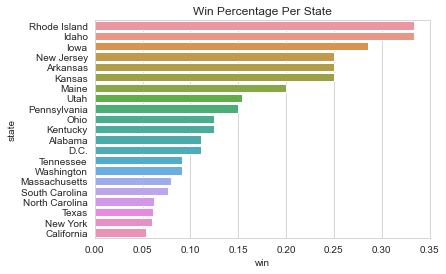

In [15]:
sns.barplot(x = 'win',
            y = 'state',
            data = top_states,
            order = top_states.state.iloc[:21]).set(
    title = "Win Percentage Per State")

[Text(0.5, 1.0, 'Age Ranges For Each Gender'),
 [Text(0, 0, 'Loss'), Text(1, 0, 'Win')],
 Text(0.5, 0, 'Result'),
 Text(0, 0.5, 'Age')]

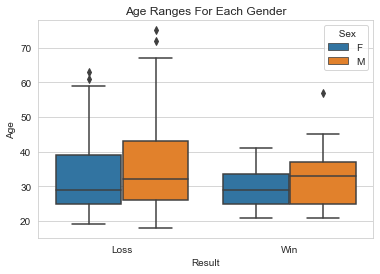

In [16]:
sns.boxplot(x = 'win',
            y = 'age',
            data = cast,
            hue = ' Sex').set(
    title = "Age Ranges For Each Gender",
    xticklabels = ['Loss', 'Win'],
    xlabel = "Result",
    ylabel = "Age")

[Text(0.5, 1.0, 'Win Rate By Personality Type'),
 Text(0, 0.5, 'Myers-Briggs Personality Type'),
 Text(0.5, 0, 'Win Rate')]

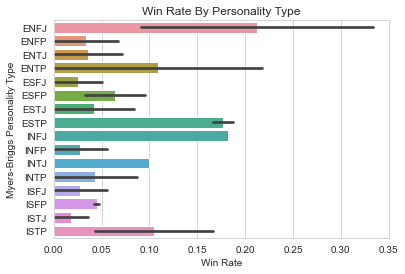

In [17]:
pers_sex_int = cast[['personality_type', ' Sex', 'win']].groupby(['personality_type', ' Sex']).mean().reset_index()
sns.barplot(x = 'win',
            y = 'personality_type',
            data = pers_sex_int).set(
    title = "Win Rate By Personality Type",
    ylabel = "Myers-Briggs Personality Type",
    xlabel = "Win Rate")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

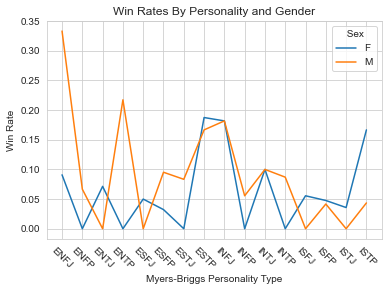

In [18]:
sns.lineplot(x = 'personality_type',
             y = 'win',
             data = pers_sex_int,
             hue = ' Sex').set(
    title = "Win Rates By Personality and Gender",
    xlabel = "Myers-Briggs Personality Type",
    ylabel = "Win Rate")
plt.xticks(rotation = -45)

# Modeling

In [56]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier       
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier     
from sklearn import tree, preprocessing
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler 

In [20]:
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
pers_encoded=le.fit_transform(cast['personality_type'])
state_encoded=le.fit_transform(cast['state'])
test_encoded=le.fit_transform(cast[' Sex'])

cast['personality_type'] = pers_encoded
cast['state'] = state_encoded
cast[' Sex'] = test_encoded
cast

/var/folders/w8/rvy6j9494k72gv7ndz97czpc0000gn/T/ipykernel_63974/1110059465.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cast['personality_type'] = pers_encoded
/var/folders/w8/rvy6j9494k72gv7ndz97czpc0000gn/T/ipykernel_63974/1110059465.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cast['state'] = state_encoded
/var/folders/w8/rvy6j9494k72gv7ndz97czpc0000gn/T/ipykernel_63974/1110059465.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

,age,personality_type,state,Sex,win
0,63,1,3,0,0
2,27,2,3,0,0
3,29,14,27,0,0
4,23,13,43,1,0
5,27,6,2,1,0
...,...,...,...,...,...
983,27,3,15,1,1
984,28,3,15,1,0
987,25,3,35,1,0
988,25,3,35,1,1


In [21]:
Y = cast.win
X = cast[['age', 'personality_type', 'state', ' Sex']]

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=713, test_size=0.4)

In [153]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, Y, test_size=0.4, stratify = cast.win, random_state= 713)

In [154]:
nb = MultinomialNB()

In [155]:
def hw (model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_prob_test = model.predict_proba(X_test)[:,1]
    y_prob_train = model.predict_proba(X_train)[:,1]
   
    n = sum(y_train)
    train = model.predict_proba(X_train)[:,1].copy()
    winners_train = pd.Series(train).sort_values(ascending = False)[:n]
    y_hat_train = []
    for i in train:
        if i < winners_train.min():
            y_hat_train.append(0)
        else: y_hat_train.append(1)


    n_test = sum(y_test)
    test = model.predict_proba(X_test)[:,1].copy()
    winners_test = pd.Series(test).sort_values(ascending = False)[:n_test]
    y_hat_test = []
    for i in test:
        if i < winners_test.min():
            y_hat_test.append(0)
        else: y_hat_test.append(1)
   
    train_accuracy = metrics.accuracy_score(y_train, y_hat_train)
    test_accuracy = metrics.accuracy_score(y_test, y_hat_test)
    f1_test = metrics.f1_score(y_test, y_hat_test)
    f1_train = metrics.f1_score(y_train, y_hat_train)
    auc_test = roc_auc_score(y_test, y_prob_test)
    auc_train = roc_auc_score(y_train, y_prob_train)
    total = {'accuracy': [train_accuracy,test_accuracy], 'F1':[f1_train, f1_test], 'AUC': [auc_train, auc_test] }
    df = pd.DataFrame.from_dict(total, orient = 'index', columns = ['train', 'test'])
    return [df, y_prob_test]


In [156]:
def hw1 (model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    
    n = sum(y_train)
    train = model.predict_proba(X_train)[:,1].copy()
    winners_train = pd.Series(train).sort_values(ascending = False)[:n]
    y_hat_train = []
    for i in train:
        if i < winners_train.min():
            y_hat_train.append(0)
        else: y_hat_train.append(1)


    n_test = sum(y_test)
    test = model.predict_proba(X_test)[:,1].copy()
    winners_test = pd.Series(test).sort_values(ascending = False)[:n_test]
    y_hat_test = []
    for i in test:
        if i < winners_test.min():
            y_hat_test.append(0)
        else: y_hat_test.append(1)
    
    y_prob_test = model.predict_proba(X_test)[:,1]
    y_prob_train = model.predict_proba(X_train)[:,1]
    
    train_accuracy = metrics.accuracy_score(y_train, y_hat_train)
    test_accuracy = metrics.accuracy_score(y_test, y_hat_test)
    
    train_prec = metrics.precision_score(y_train, y_hat_train)
    test_prec = metrics.precision_score(y_test, y_hat_test)
    
    train_recall = recall_score(y_train, y_hat_train)
    test_recall = recall_score(y_test, y_hat_test)
    
    f1_test = metrics.f1_score(y_test, y_hat_test)
    f1_train = metrics.f1_score(y_train, y_hat_train)
    
    auc_test = roc_auc_score(y_test, y_prob_test)
    auc_train = roc_auc_score(y_train, y_prob_train)
    
    conf_test = confusion_matrix(y_test, y_hat_test)
    conf_train = confusion_matrix(y_train, y_hat_train)
    
    total = {'accuracy': [train_accuracy,test_accuracy],
             'F1':[f1_train, f1_test],
             'Precision': [train_prec, test_prec],
             'Recall': [train_recall, test_recall],
             'Conf. Matrix': [conf_train, conf_test],
             'AUC': [auc_train, auc_test] }
    df = pd.DataFrame.from_dict(total, orient = 'index', columns = ['train', 'test'])
    return [df, y_prob_test]

In [158]:
nb.fit(X_train1, y_train1)
myPred = nb.predict(X_test1)

precision_score(y_test1, myPred)
recall_score(y_test1, myPred)
#confusion_matrix(X)

0.125

In [159]:
nb_res1 = hw1(nb, X_train1, y_train1, X_test1, y_test1)
nb_res1[0]

,train,test
accuracy,0.885387,0.871245
F1,0.166667,0.0625
Precision,0.166667,0.0625
Recall,0.166667,0.0625
Conf. Matrix,"[[305, 20], [20, 4]]","[[202, 15], [15, 1]]"
AUC,0.627756,0.515409


In [160]:
nb_res = hw(nb, X_train, y_train, X_test, y_test)
nb_res[0]

,train,test
accuracy,0.868195,0.879828
F1,0.080000,0.066667
AUC,0.573519,0.609939


In [161]:
lr = LogisticRegression(solver='liblinear', C=1)
lr_res = hw(lr, X_train, y_train, X_test, y_test)
lr_res[0]

,train,test
accuracy,0.868195,0.888412
F1,0.080000,0.133333
AUC,0.586481,0.679358


In [162]:
lr_res1 = hw1(lr, X_train1, y_train1, X_test1, y_test1)
lr_res1[0]

,train,test
accuracy,0.891117,0.871245
F1,0.208333,0.0625
Precision,0.208333,0.0625
Recall,0.208333,0.0625
Conf. Matrix,"[[306, 19], [19, 5]]","[[202, 15], [15, 1]]"
AUC,0.689808,0.522609


In [163]:
dc = DecisionTreeClassifier()
all_scores = []
tree_depth = np.arange(2,30)
for d in tree_depth:
    tree = DecisionTreeClassifier(max_depth=d) 
    scores = cross_val_score(tree,X_train,y_train, cv=10) 
    all_scores.append(scores.mean())
n_depth = tree_depth[np.argmax(all_scores)]
print(n_depth)

2


In [164]:
dc = DecisionTreeClassifier(max_depth = n_depth)
dc_res = hw(dc, X_train, y_train, X_test, y_test)
dc_res[0]

,train,test
accuracy,0.825215,0.781116
F1,0.227848,0.163934
AUC,0.676296,0.633792


In [165]:
dc_res1 = hw1(dc, X_train1, y_train1, X_test1, y_test1)
dc_res1[0]

,train,test
accuracy,0.87106,0.811159
F1,0.328358,0.083333
Precision,0.255814,0.0625
Recall,0.458333,0.125
Conf. Matrix,"[[293, 32], [13, 11]]","[[187, 30], [14, 2]]"
AUC,0.742436,0.46875


In [185]:
rf = RandomForestClassifier()
rf_scores = []
estimators_depth = np.arange(50, 100)
for e in estimators_depth:
    rf = RandomForestClassifier(n_estimators=d)
    scores = cross_val_score(rf,X_train,y_train, cv=10)
    rf_scores.append(scores.mean())
est_depth = estimators_depth[np.argmax(rf_scores)]
rf = RandomForestClassifier(n_estimators=est_depth, n_jobs=-1, max_depth=3)
rf_res = hw(rf, X_train, y_train, X_test, y_test)
rf_res[0]


,train,test
accuracy,0.936963,0.888412
F1,0.560000,0.133333
AUC,0.940556,0.678440


In [186]:
rf_res1 = hw1(rf, X_train1, y_train1, X_test1, y_test1)
rf_res1[0]

,train,test
accuracy,0.936963,0.862661
F1,0.541667,0.0
Precision,0.541667,0.0
Recall,0.541667,0.0
Conf. Matrix,"[[314, 11], [11, 13]]","[[201, 16], [16, 0]]"
AUC,0.936987,0.47019


In [168]:
gb = GradientBoostingClassifier(n_estimators=75, learning_rate=.1,  random_state= 713)
gb_res = hw(gb, X_train, y_train, X_test, y_test)
gb_res[0]

,train,test
accuracy,0.977077,0.871245
F1,0.840000,0.000000
AUC,0.984383,0.620642


In [169]:
gb_res1 = hw1(gb, X_train1, y_train1, X_test1, y_test1)
gb_res1[0]

,train,test
accuracy,0.974212,0.862661
F1,0.816327,0.0
Precision,0.8,0.0
Recall,0.833333,0.0
Conf. Matrix,"[[320, 5], [4, 20]]","[[201, 16], [16, 0]]"
AUC,0.995641,0.488479


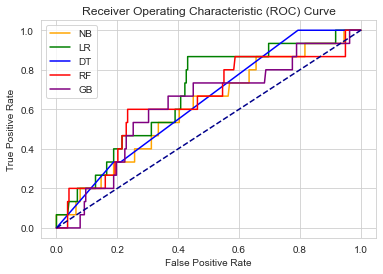

In [170]:
fpr, tpr, thresh = roc_curve(y_test, nb_res[1])
fpr_l, tpr_l, thresh_l = roc_curve(y_test, lr_res[1])
fpr_2, tpr_2, thresh_2 = roc_curve(y_test, dc_res[1])
fpr_3, tpr_3, thresh_3 = roc_curve(y_test, rf_res[1])
fpr_4, tpr_4, thresh_4 = roc_curve(y_test, gb_res[1])

plt.plot(fpr, tpr, color='orange', label='NB')
plt.plot(fpr_l, tpr_l, color='green', label='LR')
plt.plot(fpr_2, tpr_2, color='blue', label='DT')
plt.plot(fpr_3, tpr_3, color='red', label='RF')
plt.plot(fpr_4, tpr_4, color='purple', label='GB')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

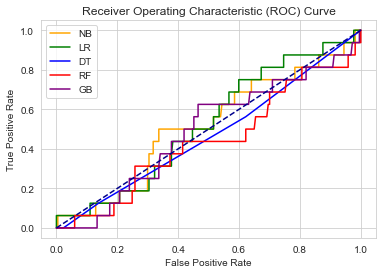

In [171]:
fpr, tpr, thresh = roc_curve(y_test1, nb_res1[1])
fpr_l, tpr_l, thresh_l = roc_curve(y_test1, lr_res1[1])
fpr_2, tpr_2, thresh_2 = roc_curve(y_test1, dc_res1[1])
fpr_3, tpr_3, thresh_3 = roc_curve(y_test1, rf_res1[1])
fpr_4, tpr_4, thresh_4 = roc_curve(y_test1, gb_res1[1])

plt.plot(fpr, tpr, color='orange', label='NB')
plt.plot(fpr_l, tpr_l, color='green', label='LR')
plt.plot(fpr_2, tpr_2, color='blue', label='DT')
plt.plot(fpr_3, tpr_3, color='red', label='RF')
plt.plot(fpr_4, tpr_4, color='purple', label='GB')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

# Results

In [212]:
#sorted(metrics.SCORERS.keys())

In [202]:
#Fit to the full data set to find most important features.
rf_full = RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=3,  random_state= 713)

rf_full.fit(X, Y)

n = sum(Y)
train = rf_full.predict_proba(X)[:,1].copy()
winners_train = pd.Series(train).sort_values(ascending = False)[:n]
y_hat = []
for i in train:
    if i < winners_train.min():
        y_hat.append(0)
    else: y_hat.append(1)
        
y_prob = rf_full.predict_proba(X)[:,1]

myAccuracy = metrics.accuracy_score(Y, y_hat)

    
myPrec = metrics.precision_score(Y, y_hat)
    
myRecall = recall_score(Y, y_hat)
    
myF1 = metrics.f1_score(Y, y_hat)

myAuc = roc_auc_score(Y, y_hat)
    
myConf = confusion_matrix(Y, y_hat)
    
total = {'accuracy': [myAccuracy],
        'F1':[myF1],
        'Precision': [myPrec],
        'Recall': [myRecall],
        'Conf. Matrix': [myConf],
        'AUC': [myAuc] }
df = pd.DataFrame.from_dict(total, orient = 'index', columns = ['Value'])

df

,Value
accuracy,0.920962
F1,0.425
Precision,0.425
Recall,0.425
Conf. Matrix,"[[519, 23], [23, 17]]"
AUC,0.691282


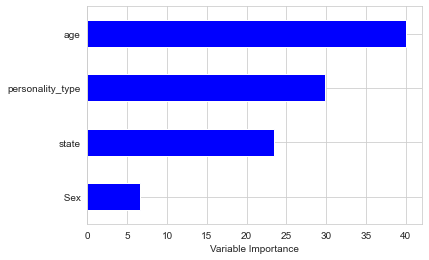

In [204]:
#Feature importances for the Random Forest Model
Importance = pd.DataFrame({'Importance':rf_full.feature_importances_*100}, index=X.columns)
Importance = Importance.iloc[rf_full.feature_importances_ > 0,:]
Importance = Importance.sort_values('Importance', axis=0, ascending=True)
Importance.plot(kind='barh', color='b', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

# Prediction for Season 41

In [205]:
pers_encoded=le.fit_transform(newest_season['personality_type'])
state_encoded=le.fit_transform(newest_season['state'])
test_encoded=le.fit_transform(newest_season[' Sex'])

newest_season['personality_type'] = pers_encoded
newest_season['state'] = state_encoded
newest_season[' Sex'] = test_encoded

/var/folders/w8/rvy6j9494k72gv7ndz97czpc0000gn/T/ipykernel_63974/3157700831.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newest_season['personality_type'] = pers_encoded
/var/folders/w8/rvy6j9494k72gv7ndz97czpc0000gn/T/ipykernel_63974/3157700831.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newest_season['state'] = state_encoded
/var/folders/w8/rvy6j9494k72gv7ndz97czpc0000gn/T/ipykernel_63974/3157700831.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [206]:
season_41_preds = rf_full.predict(newest_season)
season_41_pred_prob = pd.DataFrame(rf_full.predict_proba(newest_season))
list(season_41_pred_prob.iloc[:, 1])

[0.035348219939105315,
 0.054179616320514955,
 0.06481892866059753,
 0.03410069130177325,
 0.07589150376986278,
 0.02146395560815957,
 0.07135378550742798,
 0.01464364377707756,
 0.08330636819009761,
 0.052957281354764796,
 0.0976688068313563,
 0.08934473983014417,
 0.06850655241597747,
 0.11251084944311796,
 0.023491824797793465,
 0.04083948088228286,
 0.08505530406708647,
 0.10416843992743197]

In [207]:
newest_season_full['prediction_probs'] = list(season_41_pred_prob.iloc[:, 1])
newest_season_full[['full_name', 'prediction_probs']]

,full_name,prediction_probs
744,Eric Abraham,0.035348
745,Sara Wilson,0.054180
746,David Voce,0.064819
747,Brad Reese,0.034101
748,Jairus Robinson,0.075892
749,Genie Chen,0.021464
750,Sydney Segal,0.071354
751,Tiffany Seely,0.014644
752,Naseer Muttalif,0.083306
753,Evvie Jagoda,0.052957


In [210]:
newest_season_full[['full_name', 'prediction_probs']][newest_season_full.prediction_probs == newest_season_full.prediction_probs.max()]

,full_name,prediction_probs
757,Liana Wallace,0.112511
